In [4]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = load_svmlight_file('data/demo-g1.txt')
X,y=data[0],data[1]
X.shape
X_s,y_s=resample(X,y,n_samples=10000,replace=False)
X_train,X_test,y_train,y_test=train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [3]:
def model_eva(model,X_test,y_test):
    y_test_pred_proba=model.predict_proba(X_test)
    y_test_pred=model.predict(X_test)
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('auc:',auc(fpr,tpr))
    print(confusion_matrix(y_test,y_test_pred).T)
    plt.plot(fpr,tpr)
    plt.xlabel('fpt')
    plt.ylabel('tpr')
    plt.title('RoC')
def model_eva_hard(model,X_test,y_test):
    y_test_pred=model.predict(X_test)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred).T)

In [5]:
tree_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(penalty='l1')

In [6]:
ada_tree_clf = AdaBoostClassifier(tree_clf,n_estimators=100)


In [7]:
ada_tree_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

precision_score: 0.6894519740718916
auc: 0.7130345306772565
[[1170  527]
 [ 488  815]]


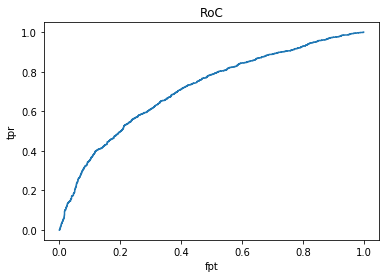

In [8]:
model_eva(ada_tree_clf,X_test,y_test)

precision_score: 0.995260663507109
auc: 0.9999832624401913
[[3990   19]
 [   1 2990]]


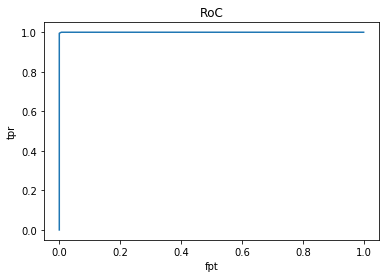

In [9]:
model_eva(ada_tree_clf,X_train,y_train)

In [11]:
ada_lr_clf = AdaBoostClassifier(lr_clf,n_estimators=100)
ada_lr_clf.fit(X_train,y_train)

/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=100, random_state=None)

precision_score: 0.570181714122192
auc: 0.6266896295994668
[[3985 3004]
 [   6    5]]


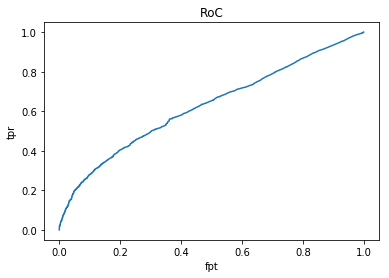

In [12]:
model_eva(ada_lr_clf,X_train,y_train)

precision_score: 0.5530707610146862
auc: 0.6360016197490737
[[1657 1339]
 [   1    3]]


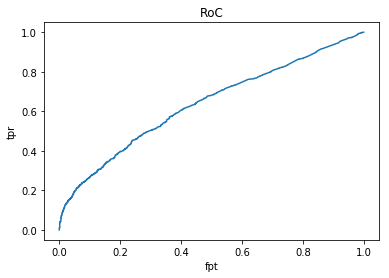

In [13]:
model_eva(ada_lr_clf,X_test,y_test)

In [14]:
y_test_stage_pred=ada_tree_clf.staged_predict_proba(X_test)

In [16]:
l=[]
for y_test_pred_proba in y_test_stage_pred:
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    l.append(auc(fpr,tpr))

In [17]:
np.argmax(l)

72

In [18]:
ada_tree_clf_best = AdaBoostClassifier(tree_clf,n_estimators=72)

In [19]:
ada_tree_clf_best.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=72, random_state=None)

precision_score: 0.6644518272425249
auc: 0.7029025597788081
[[1200  606]
 [ 458  736]]


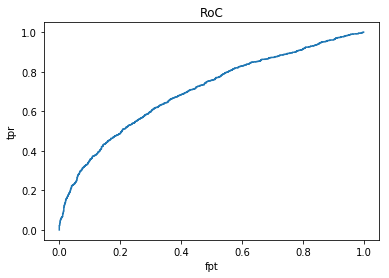

In [20]:
model_eva(ada_tree_clf_best,X_test,y_test)

In [21]:
y_test_pred_proba

array([[0.99381898, 0.00618102],
       [0.99157603, 0.00842397],
       [0.1255531 , 0.8744469 ],
       ...,
       [0.90790081, 0.09209919],
       [0.18000324, 0.81999676],
       [0.81015982, 0.18984018]])

In [22]:
gdt_tree_clf=GradientBoostingClassifier(max_depth=2,n_estimators=120)

In [23]:
gdt_tree_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

precision_score: 0.7123449497932663
auc: 0.7657860367203048
[[1206  487]
 [ 452  855]]


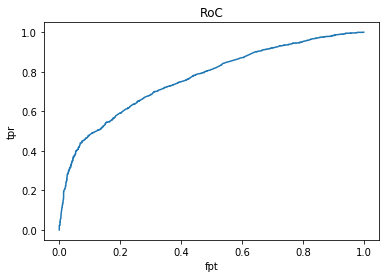

In [27]:
model_eva(gdt_tree_clf,X_test,y_test)

In [24]:
y_test_stage_pred=gdt_tree_clf.staged_predict_proba(X_test)
l=[]
for y_test_pred_proba in y_test_stage_pred:
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    l.append(auc(fpr,tpr))

In [25]:
np.argmax(l)

115

In [26]:
gdt_tree_clf_best=GradientBoostingClassifier(max_depth=2,n_estimators=115)

In [28]:
gdt_tree_clf_best.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=115,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

precision_score: 0.715727002967359
auc: 0.7664354644149578
[[1206  479]
 [ 452  863]]


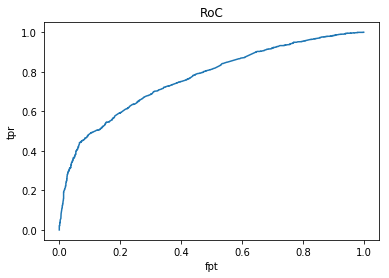

In [29]:
model_eva(gdt_tree_clf_best,X_test,y_test)

In [42]:
gdt_tree_clf_warm=GradientBoostingClassifier(max_depth=2,warm_start=True)
pre_precision=0
error_rates=0
for i in range(1,250):
    gdt_tree_clf_warm.n_estimators=i
    gdt_tree_clf_warm.fit(X_train,y_train)
    y_pred = gdt_tree_clf_warm.predict(X_test)
    cur_precision = precision_score(y_test,y_pred)
    if cur_precision>pre_precision:
        error_rates=0
        pre_precision=cur_precision
    else:
        error_rates+=1
    if error_rates>=10:
        print(cur_precision)
        print(i)
        break

0.6772486772486772
31


precision_score: 0.6772486772486772
auc: 0.743264828074692
[[1280  610]
 [ 378  732]]


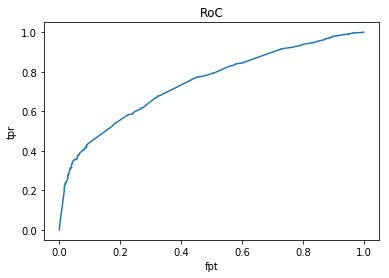

In [43]:
model_eva(gdt_tree_clf_warm,X_test,y_test)